In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\comac 12\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [51]:
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [53]:
df.shape

(300698, 53)

In [54]:
df.isnull().sum()/len(df)*100

Unique Key                          0.000000
Created Date                        0.000000
Closed Date                         0.719659
Agency                              0.000000
Agency Name                         0.000000
Complaint Type                      0.000000
Descriptor                          1.966757
Location Type                       0.043565
Incident Zip                        0.869643
Incident Address                   14.768971
Street Name                        14.768971
Cross Street 1                     16.388203
Cross Street 2                     16.554483
Intersection Street 1              85.414602
Intersection Street 2              85.579552
Address Type                        0.936155
City                                0.869311
Landmark                           99.883937
Facility Type                       0.721987
Status                              0.000000
Due Date                            0.000998
Resolution Description              0.000000
Resolution

In [55]:
#Dropping columns with more than 30% null values:
df.drop(labels=['Intersection Street 1',
                     'Intersection Street 2',
                     'Landmark',
                     'Vehicle Type',   
                     'School or Citywide Complaint', 
                     'Taxi Company Borough',
                     'Taxi Pick Up Location',
                     'Bridge Highway Name',
                     'Bridge Highway Direction',
                     'Road Ramp',
                     'Bridge Highway Segment',
                     'Garage Lot Name',
                     'Ferry Direction',
                     'Ferry Terminal Name',
                     ],axis=1, inplace=True)

In [56]:
 # percentage of missing values greater than 5% and less than 30%: Replacing values with mode
df['Incident Address'].fillna(value=df['Incident Address'].mode()[0],inplace=True)
df['Street Name'].fillna(value=df['Street Name'].mode()[0],inplace=True)
df['Cross Street 1'].fillna(value=df['Cross Street 1'].mode()[0],inplace=True)
df['Cross Street 2'].fillna(value=df['Cross Street 2'].mode()[0],inplace=True)

In [57]:
#percentage of missing value in column is less than 5%, so dropping rows:
['Closed Date','Descriptor','Location Type','Incident Zip','Adddress Type','City','Facility Type','Due Date',
 'Resolution Action updated Date','X Coordinate (State Plane)','Y Coordinate (State Plane)','School Region',
 'School Code','School Zip','Latitude','Longitude','Location']
df.dropna(inplace=True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290881 entries, 0 to 300697
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      290881 non-null  int64  
 1   Created Date                    290881 non-null  object 
 2   Closed Date                     290881 non-null  object 
 3   Agency                          290881 non-null  object 
 4   Agency Name                     290881 non-null  object 
 5   Complaint Type                  290881 non-null  object 
 6   Descriptor                      290881 non-null  object 
 7   Location Type                   290881 non-null  object 
 8   Incident Zip                    290881 non-null  float64
 9   Incident Address                290881 non-null  object 
 10  Street Name                     290881 non-null  object 
 11  Cross Street 1                  290881 non-null  object 
 12  Cross Street 2  

In [59]:
df.shape

(290881, 39)

In [60]:
df.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Incident Address                  0
Street Name                       0
Cross Street 1                    0
Cross Street 2                    0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number               

In [61]:
# convert the columns ‘Created Date’ and Closed Date’ to datetime datatype.
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [62]:
d = df['Closed Date'] - df['Created Date']

In [63]:
df['Request_Closing_Time'] = d.dt.seconds/3600

In [64]:
df.keys()

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

In [65]:
df['Request_Closing_Time']

0         0.920833
1         1.437778
2         4.858611
3         7.753889
4         3.450556
            ...   
300692    0.641389
300694    2.008611
300695    3.121389
300696    4.092500
300697    4.146944
Name: Request_Closing_Time, Length: 290881, dtype: float64

In [66]:
df['Agency Name'].unique()

array(['New York City Police Department'], dtype=object)

In [67]:
df['Agency Name'].value_counts()

New York City Police Department    290881
Name: Agency Name, dtype: int64

In [68]:
df['Complaint Type'].value_counts()

Blocked Driveway            76675
Illegal Parking             74020
Noise - Street/Sidewalk     47745
Noise - Commercial          35144
Derelict Vehicle            17496
Noise - Vehicle             16867
Animal Abuse                 7743
Traffic                      4256
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

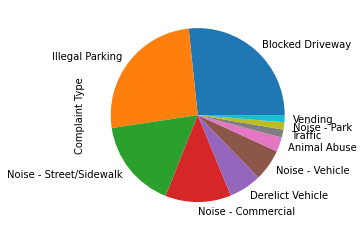

In [69]:
df['Complaint Type'].value_counts().head(10).plot(kind='pie')

In [70]:
df['Location Type'].value_counts()

Street/Sidewalk               242760
Store/Commercial               19425
Club/Bar/Restaurant            17172
Residential Building/House      5752
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Parking Lot                      116
House and Store                   93
Vacant Lot                        77
Commercial                        62
Subway Station                    22
Highway                            5
Roadway Tunnel                     5
Name: Location Type, dtype: int64

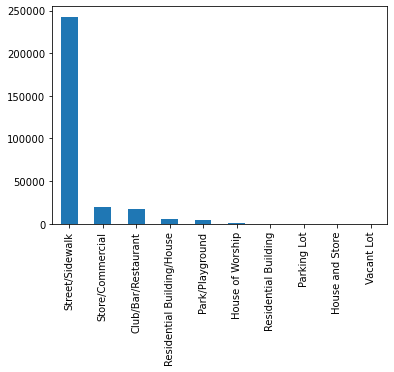

In [71]:
df['Location Type'].value_counts().head(10).plot(kind='bar')

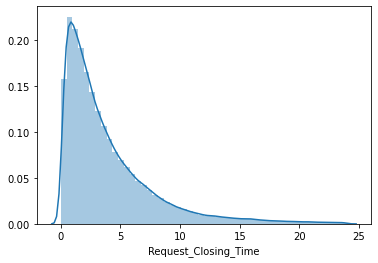

In [72]:
sns.distplot(df['Request_Closing_Time'])

In [73]:
df['Request_Closing_Time'].describe()

count    290881.000000
mean          3.925422
std           3.857343
min           0.000000
25%           1.266667
50%           2.684722
75%           5.257500
max          23.998611
Name: Request_Closing_Time, dtype: float64

## *major insights/patterns with 4 major conclusions*:

  ### 1) Top 5 "location type" having maximum complaints
   -  Street/Sidewalk             
   -  Store/Commercial               
   -  Club/Bar/Restaurant            
   -  Residential Building/House     
   -  Park/Playground  
   
   
 ### 2) Top 5 "complaint type" received
   -  Street/Sidewalk               
   -  Store/Commercial               
   -  Club/Bar/Restaurant            
   -  Residential Building/House     
   -  Park/Playground    
   
   
   
   **3) Out of the 3 Agencies, maximum complaints falls under the New York City Police Department** 
   
   **4) The mean/average time to resolve the complaints is 3.92**

# Q.N.4.  ‘Request_Closing_Time’, grouping them for different locations.


In [74]:
df_City_hours = df[['City','Request_Closing_Time']]

In [75]:
df_Request_Closing_Time_City = df_City_hours.groupby(by='City').mean()

In [213]:
df_Request_Closing_Time_City.head()

,Request_Closing_Time
City,
ARVERNE,2.286446
ASTORIA,4.428046
Astoria,4.050527
BAYSIDE,2.685011
BELLEROSE,5.993409


In [78]:
df1 = df_Request_Closing_Time_City.reset_index()

In [79]:
df1.keys()

Index(['City', 'Request_Closing_Time'], dtype='object')

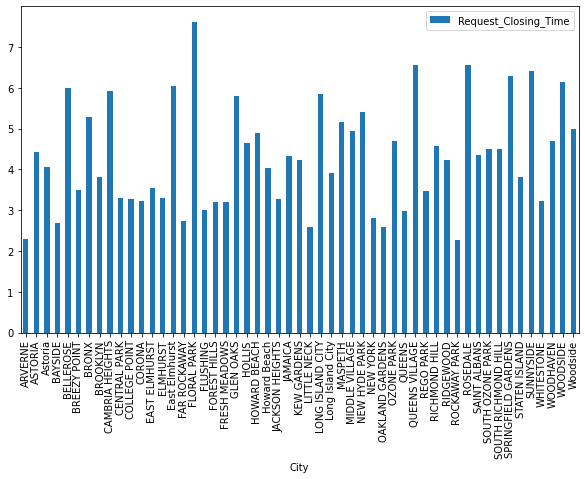

In [80]:
fig,ax = plt.subplots(figsize=(10,6))
df_Request_Closing_Time_City.plot(kind='bar',ax=ax)

In [81]:
df_city_complaint_hours = df[['City','Complaint Type','Request_Closing_Time']]

In [82]:
df_city_Request_Closing_Time = df_city_complaint_hours.groupby(by=['City','Complaint Type']).mean()

In [83]:
df_city_Request_Closing_Time.sort_values(by='Request_Closing_Time')

Request_Closing_Time
City                Complaint Type                             
ROSEDALE            Graffiti                           0.156389
ARVERNE             Drinking                           0.238611
RIDGEWOOD           Posting Advertisement              0.248611
ARVERNE             Vending                            0.483333
SUNNYSIDE           Graffiti                           0.592500
...                                                         ...
                    Animal Abuse                       9.495762
STATEN ISLAND       Graffiti                           9.562361
SPRINGFIELD GARDENS Traffic                            9.646358
COLLEGE POINT       Graffiti                          11.864167
GLEN OAKS           Animal Abuse                      12.992944

[618 rows x 1 columns]

In [84]:
df2 = df_city_Request_Closing_Time.reset_index()
df2.sort_values(by='Request_Closing_Time').reset_index()

,index,City,Complaint Type,Request_Closing_Time
0,483,ROSEDALE,Graffiti,0.156389
1,4,ARVERNE,Drinking,0.238611
2,464,RIDGEWOOD,Posting Advertisement,0.248611
3,12,ARVERNE,Vending,0.483333
4,565,SUNNYSIDE,Graffiti,0.592500
...,...,...,...,...
613,560,SUNNYSIDE,Animal Abuse,9.495762
614,550,STATEN ISLAND,Graffiti,9.562361
615,543,SPRINGFIELD GARDENS,Traffic,9.646358
616,113,COLLEGE POINT,Graffiti,11.864167


In [85]:
df2.keys()

Index(['City', 'Complaint Type', 'Request_Closing_Time'], dtype='object')

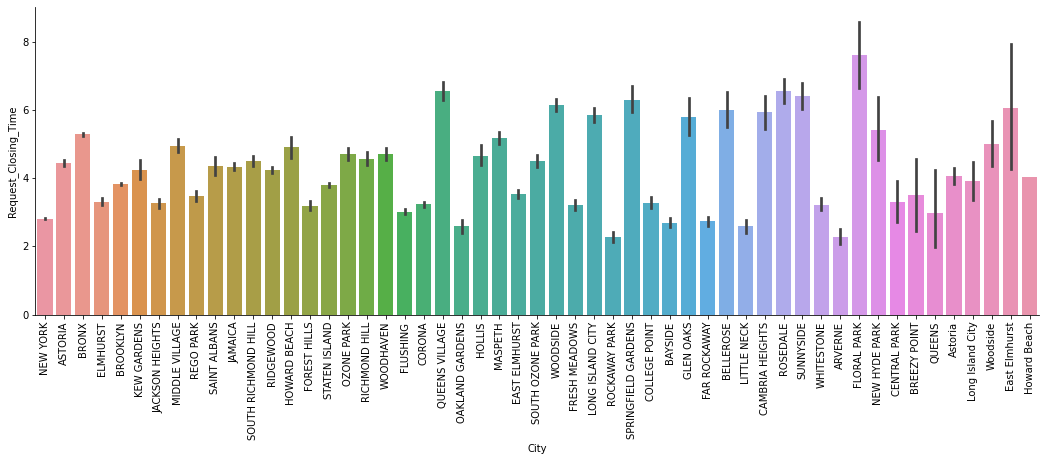

In [86]:
fig = sns.catplot(x='City',y='Request_Closing_Time',kind='bar',data=df,aspect=3)
fig.set_xticklabels(rotation=90)

## Q.N.5) Statistical Test

In [87]:
df['Location Type'].value_counts().head(3)

Street/Sidewalk        242760
Store/Commercial        19425
Club/Bar/Restaurant     17172
Name: Location Type, dtype: int64

In [88]:
df['Complaint Type'].value_counts().head(2)

Blocked Driveway    76675
Illegal Parking     74020
Name: Complaint Type, dtype: int64

In [89]:
group = df[['Unique Key','Location Type','Complaint Type']].groupby(by=['Location Type','Complaint Type'])

In [90]:
group_count = group.count()

In [91]:
group_un = group_count.unstack() #.reset_index()

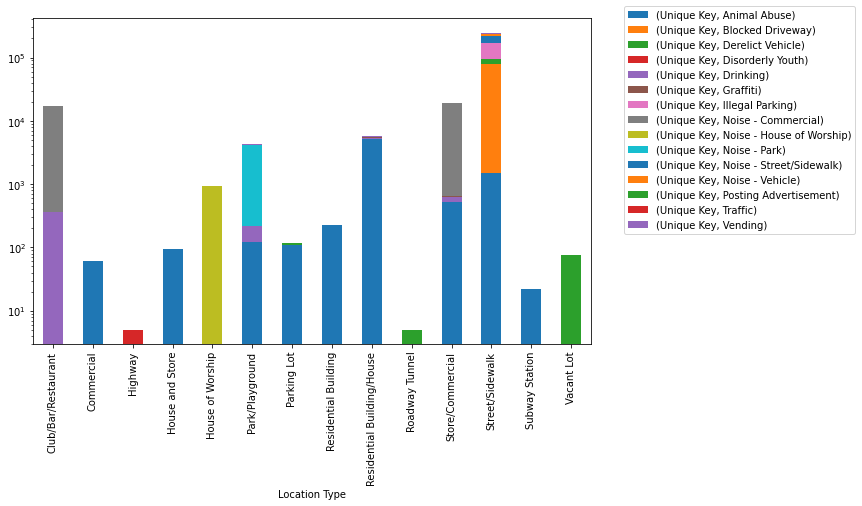

In [92]:
fig,ax = plt.subplots(figsize=(10,6))
fig= group_un.plot(kind='bar',stacked=True,ax=ax)
fig.legend(bbox_to_anchor=[1.05,1.05])
plt.yscale('log')

**if they are related what should be case ? - there are speicific kind of complaints related to located - assocation**

**if they are not relted what should be case ? - complaints are not depends on location - independent**

    HO: No Related (no association)
        alpha > 0.05
    HA: Realted (association)
        alpha < 0.05


## $ChiSquare = \frac{\sum (f_e - f_o)^2} { f_e} $

![image.png](attachment:image.png)

In [97]:
#'Location Type','Complaint Type'
comp_loc = pd.crosstab(df['Location Type'],df['Complaint Type'],margins=True)

In [98]:
total_loc = comp_loc.sum(axis=0)

In [99]:
total_comp = comp_loc.sum(axis=1)

In [100]:
comp_loc

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending,All
Location Type,,,,,,,,,,,,,,,,
Club/Bar/Restaurant,0,0,0,0,365,0,0,16807,0,0,0,0,0,0,0,17172
Commercial,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62
Highway,0,0,3,0,0,0,0,0,0,0,0,0,0,2,0,5
House and Store,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93
House of Worship,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,920
Park/Playground,120,0,0,0,96,0,0,0,0,3927,0,0,0,0,103,4246
Parking Lot,109,0,0,0,0,0,0,0,0,0,0,0,7,0,0,116
Residential Building,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226
Residential Building/House,5075,0,0,77,289,56,0,0,0,0,0,0,54,0,201,5752


## Expected table

In [101]:
N = comp_loc.iloc[-1,-1]
N

290881

In [102]:
rows,cols  = comp_loc.shape
rows,cols

(15, 16)

In [114]:
E_ij =np.zeros((rows-1,cols-1))
for i in range(cols-1):
    for j in range(rows-1):
        e = (comp_loc.iloc[-1,i] * comp_loc.iloc[j,-1])/N
        print('For {} row and {} col the e ={}'.format(j,i,e))
        E_ij[j,i] = e

For 0 row and 0 col the e =457.10375033089133
For 1 row and 0 col the e =1.6503862404213407
For 2 row and 0 col the e =0.13309566455010813
For 3 row and 0 col the e =2.475579360632011
For 4 row and 0 col the e =24.489602277219895
For 5 row and 0 col the e =113.02483833595181
For 6 row and 0 col the e =3.087819417562508
For 7 row and 0 col the e =6.015924037664887
For 8 row and 0 col the e =153.11325249844438
For 9 row and 0 col the e =0.13309566455010813
For 10 row and 0 col the e =517.07665677717
For 11 row and 0 col the e =6462.06070523685
For 12 row and 0 col the e =0.5856209240204757
For 13 row and 0 col the e =2.049673234071665
For 0 row and 1 col the e =4526.466493170747
For 1 row and 1 col the e =16.34293748990137
For 2 row and 1 col the e =1.3179788298307555
For 3 row and 1 col the e =24.514406234852054
For 4 row and 1 col the e =242.50810468885902
For 5 row and 1 col the e =1119.2276222922776
For 6 row and 1 col the e =30.57710885207353
For 7 row and 1 col the e =59.5726431083

In [104]:
# E_ij
O_ij =  comp_loc.iloc[:-1,:-1].values

In [105]:
O_ij.shape, E_ij.shape

((14, 15), (14, 15))

In [106]:
def chisquare_value(fe,fo):
    chisqure = np.square(fe-fo)/fe
    return chisqure

In [107]:
chisqure_list = []
n_row,n_col = O_ij.shape
for i in range(n_row):
    for j in range(n_col):
        chisqure_list.append(
            chisquare_value(E_ij[i,j], O_ij[i,j]))

In [144]:
chisquare_value = sum(chisqure_list)
print('chisquare_value =',chisquare_value)

chisquare_value = 1036031.2859946307


In [145]:
dof = (n_row-1)*(n_col-1)
print('Degree of Freedom =',dof)

Degree of Freedom = 182


In [110]:
from scipy import stats

In [111]:
alpha = stats.chi2.pdf(1036031.2859946307,182)# p value from the right

In [112]:
pval = 1-alpha

In [113]:
print('the alpha =',alpha)

the alpha = 0.0


## since alpha is less than 0.05 hence , complaint or service requested and location related

In [138]:
from scipy.stats import chi2_contingency

In [139]:
pd.crosstab(df['Location Type'],df['Complaint Type'], margins=True)

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending,All
Location Type,,,,,,,,,,,,,,,,
Club/Bar/Restaurant,0,0,0,0,365,0,0,16807,0,0,0,0,0,0,0,17172
Commercial,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62
Highway,0,0,3,0,0,0,0,0,0,0,0,0,0,2,0,5
House and Store,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93
House of Worship,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,920
Park/Playground,120,0,0,0,96,0,0,0,0,3927,0,0,0,0,103,4246
Parking Lot,109,0,0,0,0,0,0,0,0,0,0,0,7,0,0,116
Residential Building,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226
Residential Building/House,5075,0,0,77,289,56,0,0,0,0,0,0,54,0,201,5752


In [149]:
ch2,p_value,dof,exp_freq = stats.chi2_contingency(pd.crosstab(df['Location Type'],df['Complaint Type'], margins=True))
print(ch2)
print(p_value)
print(dof)

1036031.2859946301
0.0
210


#### since alpha is less than 0.05. Hence , complaint or service requested and location related

# Q.N 5) I.  average response time across complaint types is similar or not


#### Hypothesis Testing:
 
- H0: Average response time across complaint types is not similar 

  if p-val >0.05
  
  
- HA: Average response time across complaint types is similar

  if p-val <0.05

In [153]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",3.450556


In [199]:
df['Complaint Type'].value_counts().head()
Top5_Complaints_type = df['Complaint Type'].value_counts().head()

In [200]:
Top5_Complaints_type_names = Top5_Complaints_type.index

In [201]:
Top5_Complaints_type_names

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [204]:
data = df.loc[df['Complaint Type'].isin(Top5_Complaints_type_names),['Complaint Type', 'Request_Closing_Time']]
data.head()

,Complaint Type,Request_Closing_Time
0,Noise - Street/Sidewalk,0.920833
1,Blocked Driveway,1.437778
2,Blocked Driveway,4.858611
3,Illegal Parking,7.753889
4,Illegal Parking,3.450556


In [207]:
d1 = df[df['Complaint Type']== Top5_Complaints_type_names[0]].Request_Closing_Time
d1.head()

1     1.437778
2     4.858611
7     1.798611
9     1.383889
10    7.800556
Name: Request_Closing_Time, dtype: float64

In [208]:
d2 = df[df['Complaint Type']== Top5_Complaints_type_names[1]].Request_Closing_Time
d2.head()

3    7.753889
4    3.450556
5    1.891667
6    1.957778
8    8.550556
Name: Request_Closing_Time, dtype: float64

In [209]:
d3 = df[df['Complaint Type']== Top5_Complaints_type_names[2]].Request_Closing_Time
d3.head()

0     0.920833
12    2.482500
19    0.784722
38    0.491111
54    1.495556
Name: Request_Closing_Time, dtype: float64

In [210]:
d4 = df[df['Complaint Type']== Top5_Complaints_type_names[3]].Request_Closing_Time
d4.head()

17    0.852222
18    2.933611
22    1.261667
29    2.499722
30    1.985833
Name: Request_Closing_Time, dtype: float64

In [211]:
d5 = df[df['Complaint Type']== Top5_Complaints_type_names[4]].Request_Closing_Time
d5.head()

14     10.489722
151     3.950278
255     1.364722
256     4.133056
295     0.753333
Name: Request_Closing_Time, dtype: float64

In [212]:
stats.f_oneway(d1,d2,d3,d4,d5)

F_onewayResult(statistic=2080.3676275129005, pvalue=0.0)

#### Here we can observe that p-value is less than 0.05, so we reject the null hypothesis and accept the alternate hypothesis. Hence we can say that response time across complaint type is not similar.